# Supervised Learning

## Classification

### Preparation

Untuk persiapan, kita akan memanggil seluruh library yang akan kita pakai pada project kali ini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [6]:
train = pd.read_csv("titanic.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
d = train.describe()
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-9-7bc755489b8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

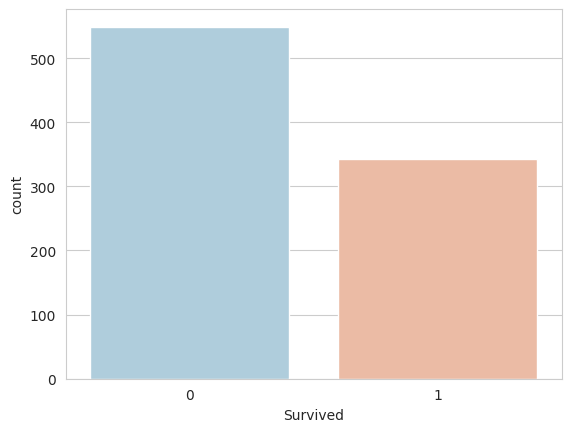

In [9]:
# Cek relative size dari survived dan not survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

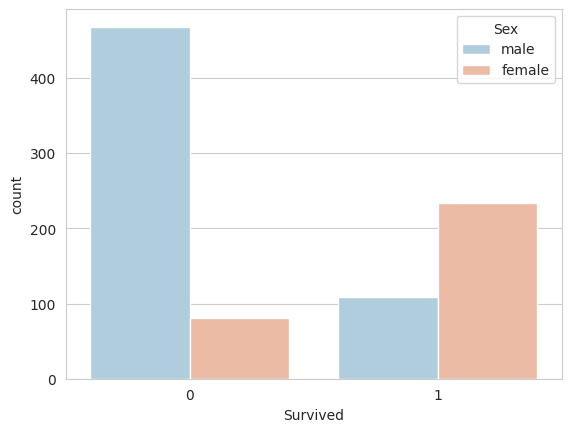

In [12]:
# Survivablity vs sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

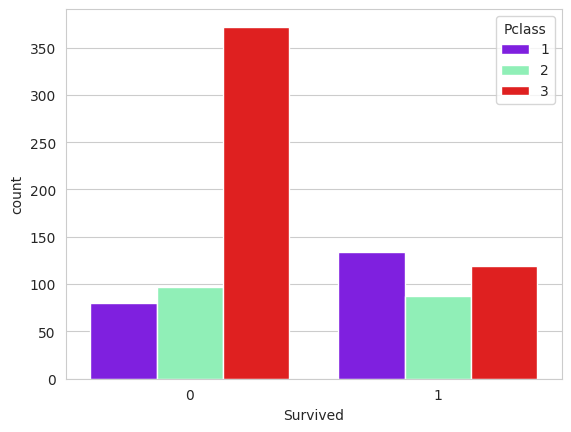

In [25]:
# Survivablity vs passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

Text(0.5, 1.0, 'Persentase penumpang yang selamat berdasarkan kelas')

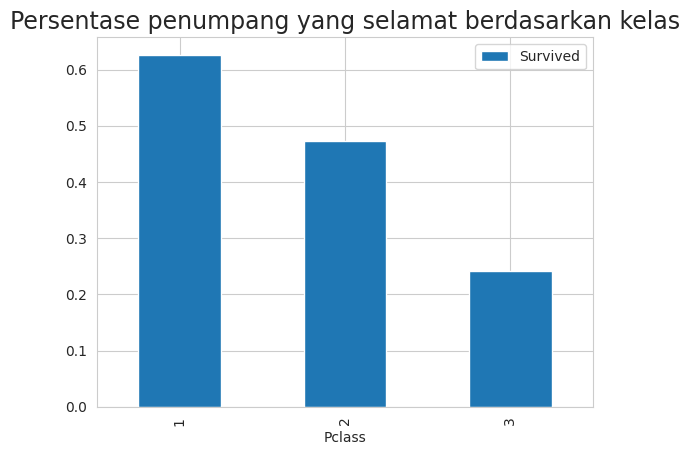

In [26]:
f_class_survived=train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
plt.title("Persentase penumpang yang selamat berdasarkan kelas",fontsize=17)

<Axes: xlabel='Survived', ylabel='count'>

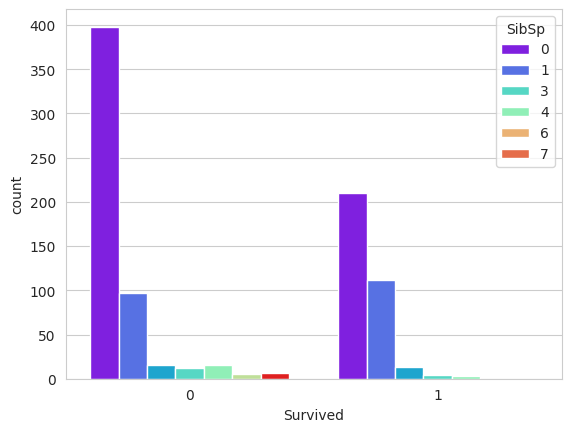

In [15]:
# Survived vs Sibling and Spouses
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=train,palette='rainbow')

<Axes: title={'center': 'Histogram usia penumpang'}, xlabel='Usia penumpang', ylabel='Count'>

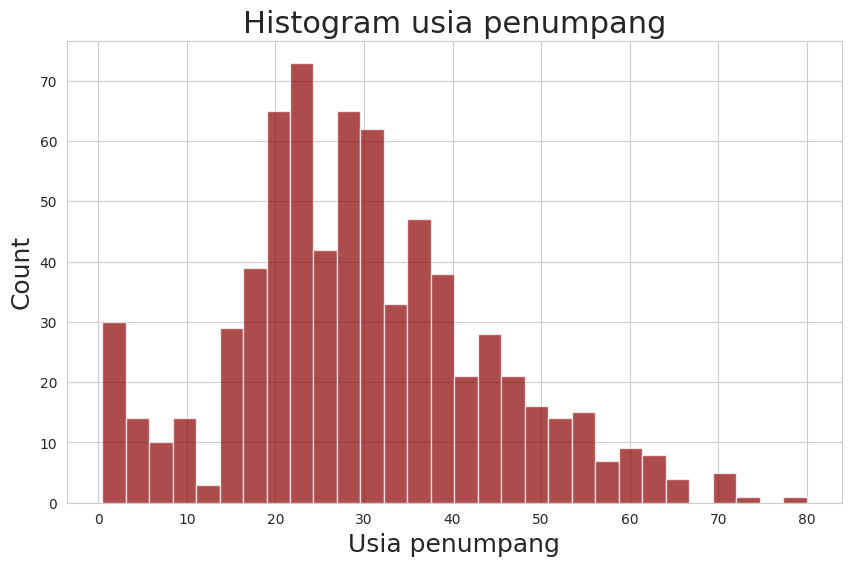

In [16]:
# Cek distribusi dari umur
plt.xlabel("Usia penumpang",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Histogram usia penumpang",fontsize=22)
train['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

<ipython-input-17-1bb3acdf5dc3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Passenger Class', ylabel='Age'>

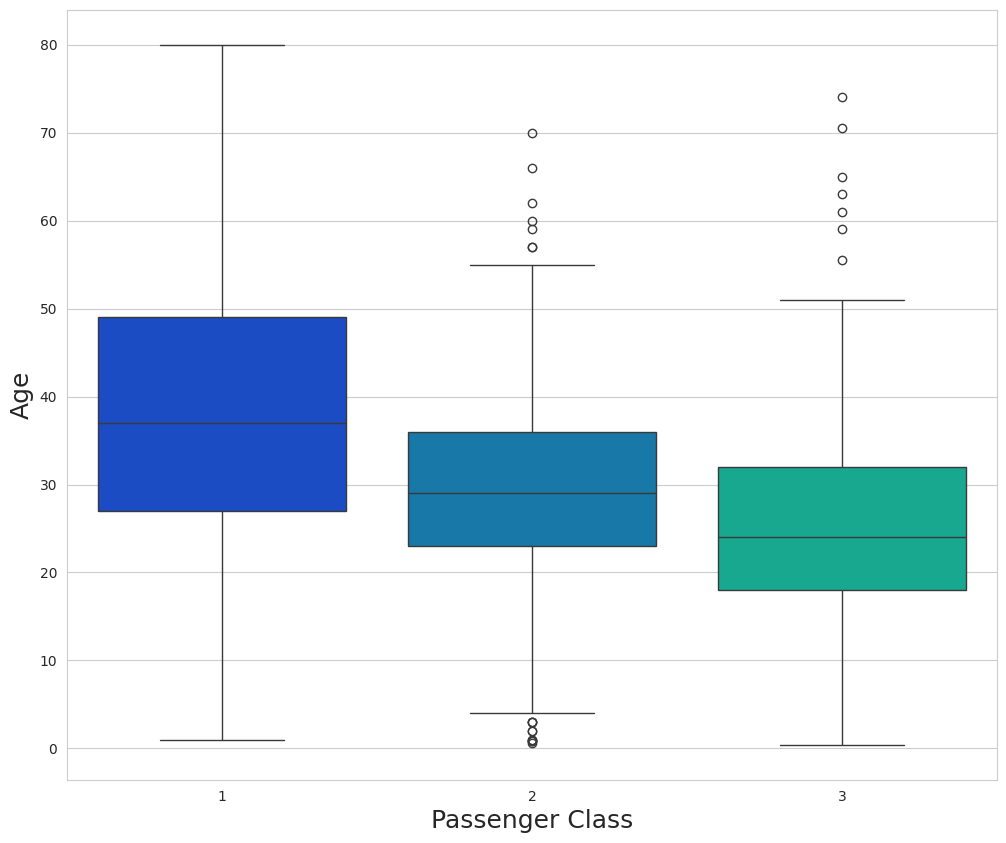

In [17]:
# Distribusi umur di setiap kelas
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Text(0.5, 0, 'Passenger class')

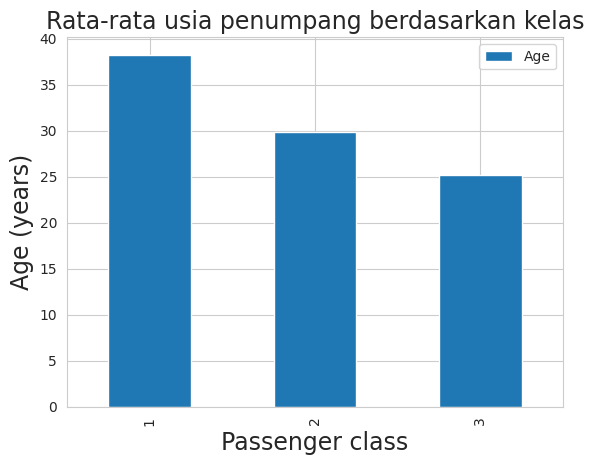

In [18]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Rata-rata usia penumpang berdasarkan kelas",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

### Fitur Engineering

In [19]:
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<ipython-input-19-7d5da24aec80>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-19-7d5da24aec80>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Text(0.5, 1.0, 'Bar plot jumlah fitur numerik')

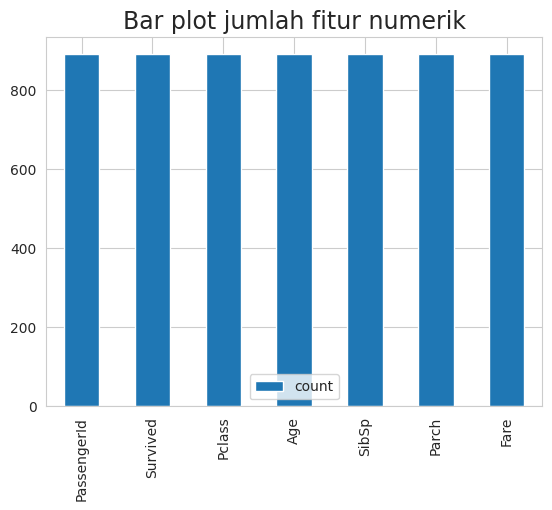

In [21]:
d=train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot jumlah fitur numerik",fontsize=17)

In [22]:
# drop cabin karena memiliki banyak null value (>50%)
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# Drop semua kolom yang tidak penting
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Training

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=42)

In [30]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (622, 7)
Test shape: (267, 7)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()

clf1.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = clf1.predict(X_test)

### Evaluation

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred) #akurasi model
print(f'Akurasi Model KNN: {accuracy:.2f}')

print("Confusion Matrix:") #confusion matrix nya
print(confusion_matrix(y_test, y_pred))

print("Classification Report:") #laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi Model KNN: 0.71
Confusion Matrix:
[[136  31]
 [ 47  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       167
           1       0.63      0.53      0.58       100

    accuracy                           0.71       267
   macro avg       0.69      0.67      0.68       267
weighted avg       0.70      0.71      0.70       267

